In [1]:
import numpy as np
np.random.seed(777)
import pandas as pd
from utils import BSplineFeatures, get_natural_cubic_spline_model

# Question 3

## a) Generate a vector x consisting of 50 points drawn at random from Uniform[0,1]

In [2]:
X = np.random.uniform(0,1,50)
# save simulation result in a dict
Y_dict = {}

## b) Generate 100 training sets.

In [3]:
X = np.sort(np.random.uniform(0,1,50))
y = (np.sin(2*np.pi*X))**3 + np.random.normal(0,1,50)
# X = X.reshape(-1,1)

### i. Fit the data with methods/models listed below.

OLS with linear model

In [4]:
from sklearn.linear_model import LinearRegression
y_list = []
for _ in range(0, 100):
    y = (np.sin(2*np.pi*X))**3 + np.random.normal(0,1,50)
    reg = LinearRegression().fit(X.reshape(-1,1), y)
    y_ols = reg.predict(X.reshape(-1,1)).reshape(-1,1)
    y_list.append(y_ols)

# print('Coefficients: \n', reg.coef_)
# print('Intercept: \n', reg.intercept_)
Y_ols = np.concatenate(y_list, axis=1)
Y_dict['ols'] = Y_ols

OLS with cubic polynomial model

In [5]:
from sklearn.preprocessing import PolynomialFeatures
y_list = []
for _ in range(0, 100):
    # X = np.random.uniform(0,1,50)
    y = (np.sin(2*np.pi*X))**3 + np.random.normal(0,1,50)
    # X = X.reshape(-1,1)
    poly = PolynomialFeatures(degree=3)
    X_ = poly.fit_transform(X.reshape(-1,1))
    X_ = X_[:,1:]
    reg = LinearRegression().fit(X_, y)
    y_polyols = reg.predict(X_).reshape(-1,1)
    y_list.append(y_polyols)

# print('Coefficients: \n', reg.coef_)
# print('Intercept: \n', reg.intercept_)
Y_poly = np.concatenate(y_list, axis=1)
Y_dict['poly'] = Y_poly

Cubic spline (or B-spline) with 2 knots at 0.33 and 0.66

In [6]:
from scipy.interpolate import BSpline, splrep, splev


y_list = []
for _ in range(0, 100):
    X = np.sort(np.random.uniform(0,1,50))
    y = (np.sin(2*np.pi*X))**3 + np.random.normal(0,1,50)
    Xck = splrep(X, y, t=[0.33, 0.66], k=3)
    y_cubic_spl = splev(X, Xck).reshape(-1,1)
    y_list.append(y_cubic_spl)

# print('Coefficients: \n', reg.coef_)
# print('Intercept: \n', reg.intercept_)
Y_cubic_spl = np.concatenate(y_list, axis=1)
Y_dict['cubic_spl'] = Y_cubic_spl


Natural cubic spline with 5 knots at 0.1,0.3,0.5,0.7,0.9

In [8]:
y_list = []
for _ in range(0, 100):
    # X = np.sort(np.random.uniform(0,1,50))
    y = (np.sin(2*np.pi*X))**3 + np.random.normal(0,1,50)
    ns = get_natural_cubic_spline_model(X, y, minval=0.1, maxval=0.9, n_knots=9)
    y_cubic_nat_spl = ns.predict(X).reshape(-1,1)
    y_list.append(y_cubic_nat_spl)

Y_cubic_nat_spl = np.concatenate(y_list, axis=1)
Y_dict['cubic_nat_spl'] = Y_cubic_nat_spl

Smoothing spline with tuning parameter chosen by GCV

In [9]:
import numpy as np
import csaps

y_list = []
for _ in range(0, 100):
    # X = np.sort(np.random.uniform(0,1,50))
    y = (np.sin(2*np.pi*X))**3 + np.random.normal(0,1,50)
    sp = csaps.UnivariateCubicSmoothingSpline(X, y, smooth=0.2)
    y_smooth_spl = sp(X).reshape(-1,1)
    y_list.append(y_smooth_spl)

Y_smooth_spl = np.concatenate(y_list, axis=1)
Y_dict['smooth_spl'] = Y_smooth_spl


## c) for each method/model, you obtain a matrix of fitted values

In [18]:
# results are saved in Y_dict with keys indicating method and values as matrix of fitted values
# print(Y_dict)

## d) For each method/model, compute the pointwise variance of fitted values across the 100 training sets. Plot the pointwise variance curves (against x) for each method/model.

OLS with linear model:

In [ ]:
np.var(Y_ols, axis = 1)

OLS with cubic polynomial model: 

In [ ]:
np.var(Y_poly, axis = 1)

Cubic spline (or B-spline) with 2 knots:

In [ ]:
np.var(Y_cubic_spl, axis = 1)

Natural cubic spline with 5 knots:

In [14]:
np.var(Y_cubic_nat_spl, axis=1)

array([0.18591125, 0.18447251, 0.16458595, 0.09325814, 0.08678544,
       0.07917913, 0.11919667, 0.14558672, 0.1911655 , 0.24258667,
       0.29279007, 0.20740344, 0.20729337, 0.25979485, 0.21479825,
       0.18183346, 0.13438331, 0.12712894, 0.15831766, 0.16385555,
       0.16896881, 0.14517606, 0.13227678, 0.12603886, 0.31785383,
       0.34952001, 0.18775492, 0.16699038, 0.17741799, 0.18557497,
       0.14607211, 0.1216888 , 0.1203946 , 0.10780592, 0.10784779,
       0.11080663, 0.1096157 , 0.10949974, 0.10891502, 0.10534662,
       0.09378352, 0.13675094, 0.16407411, 0.14169222, 0.1004892 ,
       0.09924581, 0.09234724, 0.28092722, 0.32016799, 0.32372103])

Smoothing spline with tuning parameter chosen by GCV:

In [15]:
np.var(Y_smooth_spl, axis=1)

array([0.08476956, 0.08459904, 0.08213369, 0.06961303, 0.06748119,
       0.06168593, 0.04993347, 0.04683251, 0.04291233, 0.03935216,
       0.03458341, 0.02682235, 0.02523397, 0.02146369, 0.01976498,
       0.01915192, 0.01820991, 0.01801103, 0.01589148, 0.01574136,
       0.01529988, 0.01483044, 0.01466302, 0.01427365, 0.01403607,
       0.0140842 , 0.01506054, 0.01580835, 0.01615341, 0.01637147,
       0.01931397, 0.02016803, 0.02022738, 0.02109386, 0.02268881,
       0.02519554, 0.0254402 , 0.02546224, 0.02556993, 0.02615587,
       0.02956713, 0.03417489, 0.03778057, 0.04466324, 0.05249265,
       0.05291642, 0.05696761, 0.09103241, 0.09475819, 0.09508322])

Plot

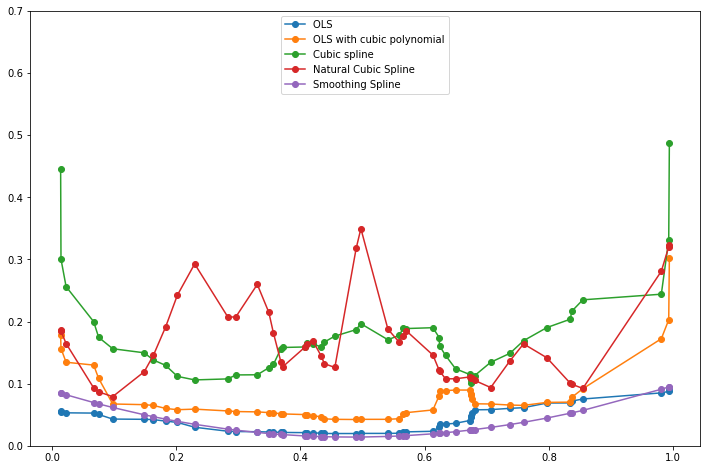

In [36]:
from cProfile import label
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

plt.plot(X, np.var(Y_ols, axis = 1), 'o-', label = "OLS ")
plt.plot(X, np.var(Y_poly, axis=1), 'o-', label = "OLS with cubic polynomial")
plt.plot(X, np.var(Y_cubic_spl, axis=1), 'o-', label = "Cubic spline")
plt.plot(X, np.var(Y_cubic_nat_spl, axis=1), 'o-', label = "Natural Cubic Spline")
plt.plot(X, np.var(Y_smooth_spl, axis=1), 'o-', label = "Smoothing Spline")
leg = plt.legend(loc='upper center')
plt.ylim(0,0.7)
plt.show()

# Question 4

The South African heart disease data. Divide the dataset into a training set consisting of the first 300 observations, and
a test set consisting of the remaining observations. Apply logistic regression,
LDA and QDA on the training set. For each method, report the test error and
its standard error over the test set. Briefly discuss your results.

In [45]:
df = pd.read_csv('data/africa_heart.csv')
df["famhist"] = df["famhist"].astype('category')
df["famhist"] = df["famhist"].cat.codes
df_train =  df.iloc[0:300, :]
X_train = df_train.drop(['chd'], axis=1)
y_train = df_train.chd
df_test =  df.iloc[300:, :]
X_test = df_test.drop(['chd'], axis=1)
y_test = df_test.chd

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/zheyanliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


test error

In [51]:
from sklearn import metrics
from sklearn.metrics import classification_report

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
target_names = ['without heart disease', 'with heart disease']
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

without heart disease       0.79      0.82      0.81       112
   with heart disease       0.57      0.52      0.54        50

             accuracy                           0.73       162
            macro avg       0.68      0.67      0.67       162
         weighted avg       0.72      0.73      0.73       162



std error over test set

In [52]:
np.std(y_pred)/np.sqrt(len(y_pred))

0.03542708249696834

## LDA

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

test error

In [62]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

without heart disease       0.81      0.83      0.82       112
   with heart disease       0.60      0.56      0.58        50

             accuracy                           0.75       162
            macro avg       0.70      0.70      0.70       162
         weighted avg       0.74      0.75      0.74       162



std error over test set

In [58]:
np.std(y_pred)/np.sqrt(len(y_pred))

0.035655401181262085

## QDA

In [64]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

test error

In [65]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

without heart disease       0.82      0.80      0.81       112
   with heart disease       0.58      0.60      0.59        50

             accuracy                           0.74       162
            macro avg       0.70      0.70      0.70       162
         weighted avg       0.74      0.74      0.74       162



standard error over test set

In [66]:
np.std(y_pred)/np.sqrt(len(y_pred))

0.036679676151223424

## Discuss

* Logistic Regression has the lowest std error over the test set
* LDA has the highest accuracy and f1-score on the without heart disease observations